In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_profiling

In [3]:
URL ="https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/iris.csv"

In [4]:
df = pd.read_csv(URL)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
Co = df.corr()
Co

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


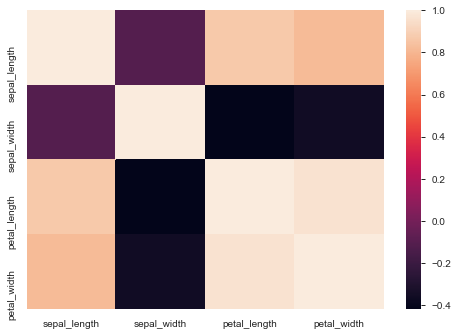

In [9]:
sns.heatmap(Co)

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
pandas_profiling.ProfileReport(df)

ImportError: Numba could not be imported.
If you are seeing this message and are undertaking Numba development work, you may need to re-run:

python setup.py build_ext --inplace

(Also, please check the development set up guide http://numba.pydata.org/numba-doc/latest/developer/contributing.html.)

If you are not working on Numba development:

Please report the error message and traceback, along with a minimal reproducer
at: https://github.com/numba/numba/issues/new

If more help is needed please feel free to speak to the Numba core developers
directly at: https://gitter.im/numba/numba

Thanks in advance for your help in improving Numba!

The original error was: 'DLL load failed: The specified module could not be found.'
--------------------------------------------------------------------------------
If possible please include the following in your error report:

sys.executable: c:\users\me\appdata\local\programs\python\python36\python.exe


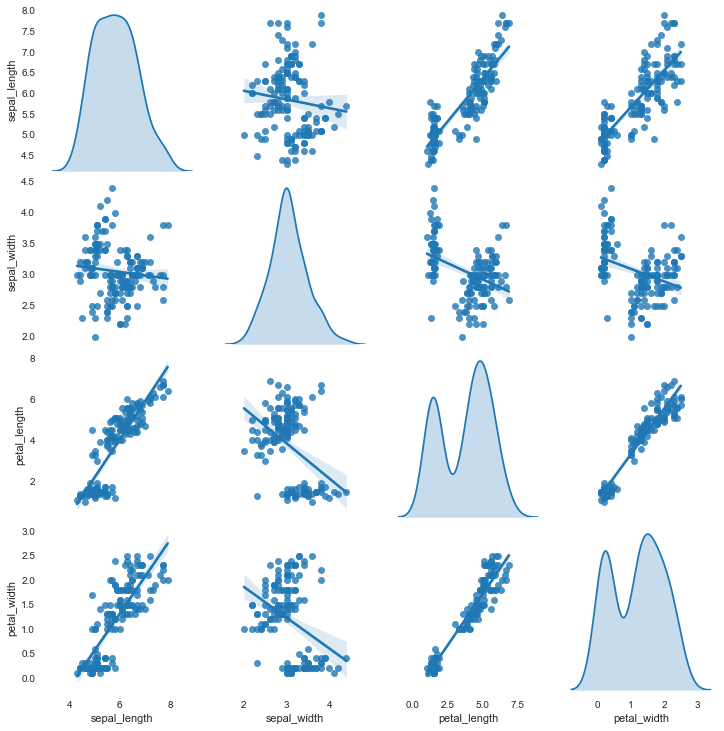

In [13]:
sns.pairplot(df,diag_kind='kde',kind='reg')

In [14]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
df.species 

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [16]:
Target = df.species

In [17]:
T = pd.get_dummies(Target)
T

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [18]:
F = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
F.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
from sklearn.preprocessing import normalize,LabelEncoder

In [20]:
he = normalize(F,norm='max')

In [21]:
he[0:5]

array([[1.        , 0.68627451, 0.2745098 , 0.03921569],
       [1.        , 0.6122449 , 0.28571429, 0.04081633],
       [1.        , 0.68085106, 0.27659574, 0.04255319],
       [1.        , 0.67391304, 0.32608696, 0.04347826],
       [1.        , 0.72      , 0.28      , 0.04      ]])

In [22]:
Target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [23]:
le =LabelEncoder()
T = le.fit_transform(Target)
T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
Lr = LogisticRegression()

In [26]:
Lr.fit(F,T)

LogisticRegression()

In [27]:
Lr.coef_

array([[-0.42339226,  0.96169291, -2.51946477, -1.08602318],
       [ 0.53411224, -0.31794231, -0.20537369, -0.93961347],
       [-0.11071998, -0.6437506 ,  2.72483846,  2.02563664]])

In [28]:
importance = Lr.coef_[2]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -0.11072
Feature: 1, Score: -0.64375
Feature: 2, Score: 2.72484
Feature: 3, Score: 2.02564


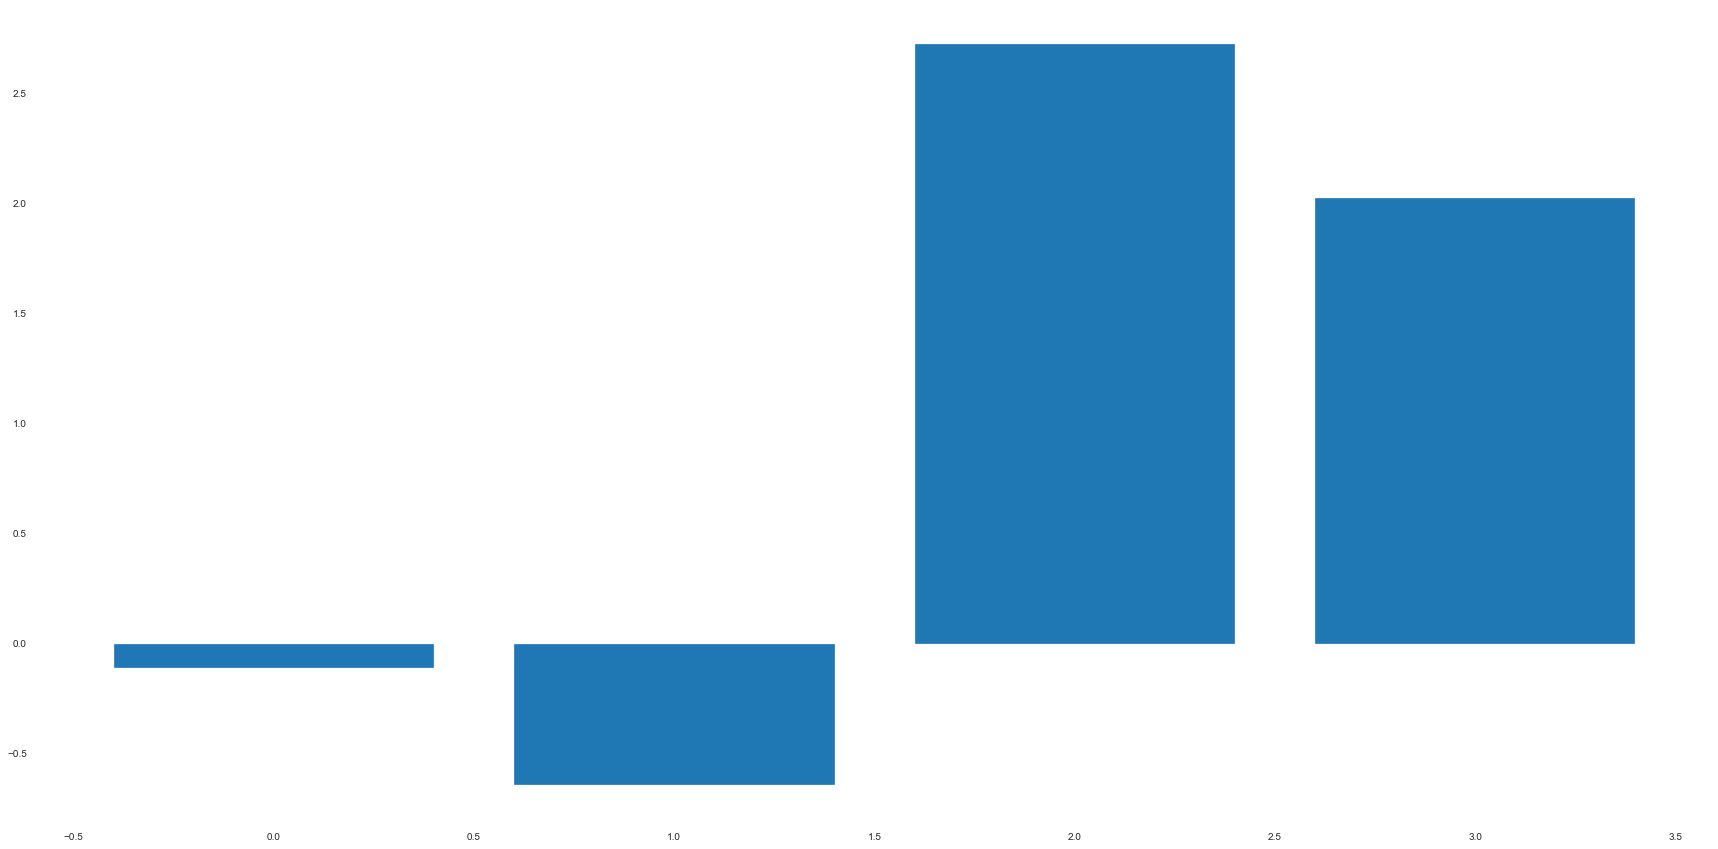

In [29]:
plt.figure(figsize=(30,15))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [30]:
Lr.score(F,T)

0.9733333333333334

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
Knn = KNeighborsClassifier()

In [33]:
Knn.fit(F,T)

KNeighborsClassifier()

In [34]:
Knn.score(F,T)

0.9666666666666667